# Lab 1
### Roman Ahmad Zeia - 100821974

# Part 1 - Data & Visualization

In [156]:
import numpy as np
import matplotlib as mp
import pandas as pd
from pandas.api.types import is_numeric_dtype





In [157]:
data_file = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data';

In [175]:
## Convert "?" to standard (nan) values in the data set
data = pd.read_csv(data_file, header=None, na_values= [" ?"])
data.head() ## view the data from the head


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [176]:
data.columns = ['age','workclass','fnlwgt','education','education-level', 'martial-stat','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

## apply column headers for each attribute
data.head()

,age,workclass,fnlwgt,education,education-level,martial-stat,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [177]:
data.isnull().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
education-level       0
martial-stat          0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [178]:
## finding the mean mean, sd, min and max for each attribute
## continous attributes in the dataset: 0,2,4,10,11,12
cont_attr = ['age','fnlwgt','education-level','capital-gain','capital-loss','hours-per-week']

for i in cont_attr:
    if is_numeric_dtype(data[i]):
        print('%s' % (i))
        print('\t Mean = %.2f' % data[i].mean())
        print('\t Standard deviation = %.2f' % data[i].std())
        print('\t Minimum = %.2f' % data[i].min())
        print('\t Maximum = %.2f' % data[i].max())



age
	 Mean = 38.58
	 Standard deviation = 13.64
	 Minimum = 17.00
	 Maximum = 90.00
fnlwgt
	 Mean = 189778.37
	 Standard deviation = 105549.98
	 Minimum = 12285.00
	 Maximum = 1484705.00
education-level
	 Mean = 10.08
	 Standard deviation = 2.57
	 Minimum = 1.00
	 Maximum = 16.00
capital-gain
	 Mean = 1077.65
	 Standard deviation = 7385.29
	 Minimum = 0.00
	 Maximum = 99999.00
capital-loss
	 Mean = 87.30
	 Standard deviation = 402.96
	 Minimum = 0.00
	 Maximum = 4356.00
hours-per-week
	 Mean = 40.44
	 Standard deviation = 12.35
	 Minimum = 1.00
	 Maximum = 99.00


In [179]:
## finding frequency for each discrete attribute

## list of discrete attributes in dataset
discrete_attributes = ['workclass','education','martial-stat','occupation',
                       'relationship','race','sex','native-country']

## traverse through it
for i in discrete_attributes:
    print(data[i].value_counts())
    print("\n")



workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


martial-stat
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical     

<Axes: >

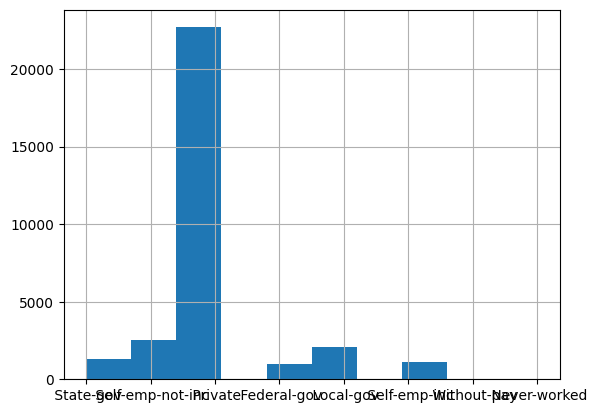

In [163]:
## Histogram for the attribute 'workclass'

%matplotlib inline
data['workclass'].hist(bins = 10)

<Axes: >

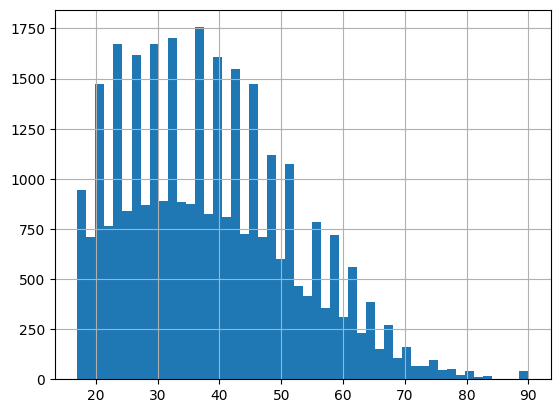

In [180]:
# Histogram for the attribute 'age'
## we will be using a bin of 50 to have a more in depth view of the frequency of different ages

%matplotlib inline
data['age'].hist(bins = 50)

## Scatter Plots

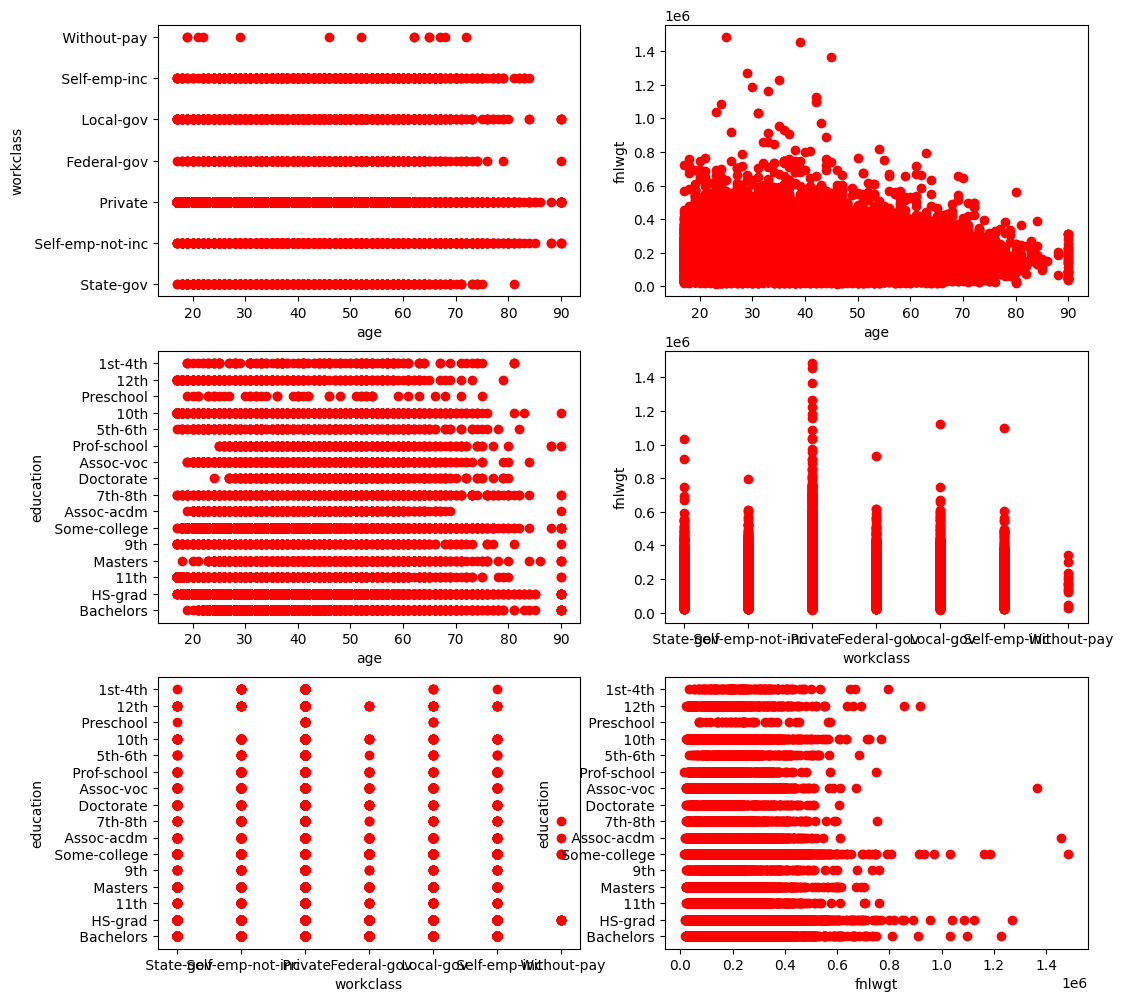

In [181]:
import matplotlib.pyplot as plt

cleaned_data = data.dropna()
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(cleaned_data[cleaned_data.columns[i]], cleaned_data[cleaned_data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(cleaned_data.columns[i])
        axes[ax1][ax2].set_ylabel(cleaned_data.columns[j])
        index = index + 1



# Parallel Coordinates
## workclass

<Axes: >

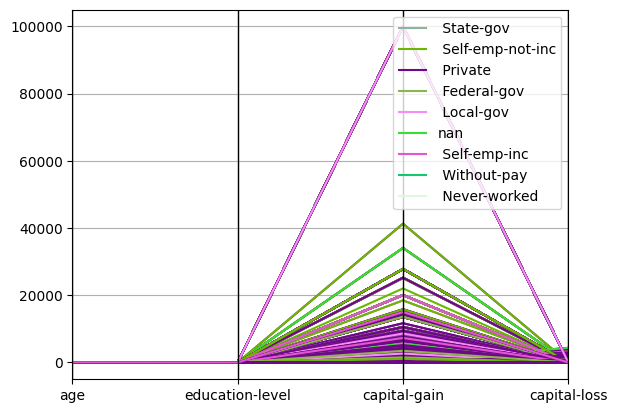

In [182]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

plotting_data = data[['workclass']+ ['age','education-level','capital-gain','capital-loss']]
parallel_coordinates(plotting_data, 'workclass')


# Parallel Coordinates
## education

(0.0, 1000.0)

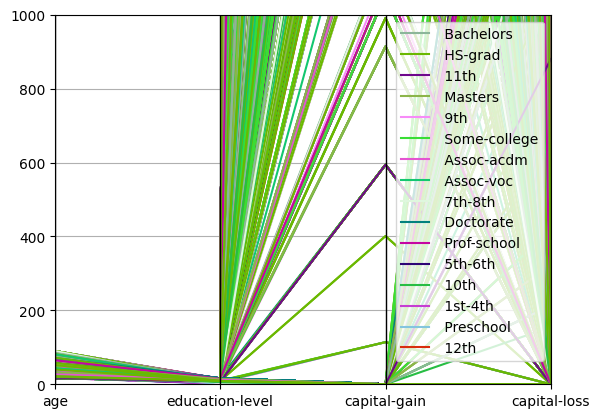

In [167]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

plotting_data = data[['education']+ ['age','education-level','capital-gain','capital-loss']]
parallel_coordinates(plotting_data, 'education')
plt.ylim(0,1000)

# Observation

## workclass
### with the workclass parallel coordinate plot we can see that there is clustering around the bottom at the capital-gain axis so we can assume that there is a average earnings amongst the people in the data set. We can also see outliers such as some self employed poeple making a high earning.

## education
### with the education class parallel coordinate plot we can see some trends where people with a higher education such as Prof-school are higher earning people than ones with lower education levels such as highschool grad in the lower capital section which makes logical sense.

# Part 2

In [168]:
data.isnull().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
education-level       0
martial-stat          0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [169]:
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)


/var/folders/vq/sp8r9yc532j9qg7c016mgpth0000gn/T/ipykernel_46791/1648443973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
/var/folders/vq/sp8r9yc532j9qg7c016mgpth0000gn/T/ipykernel_46791/1648443973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [170]:
for occupation_class in data['occupation'].unique():
    for col in data.columns:
        mode_value = data[data['occupation'] == occupation_class][col].mode()[0]
        data.loc[(data['occupation'] ==occupation_class) & (data[col].isnull()), col] == mode_value
        

for workclass_class in data['workclass'].unique():
    for col in data.columns:
        mode_value = data[data['workclass'] == workclass_class][col].mode()[0]
        data.loc[(data['workclass'] ==workclass_class) & (data[col].isnull()), col] == mode_value
        

for nc_class in data['native-country'].unique():
    for col in data.columns:
        mode_value = data[data['native-country'] == nc_class][col].mode()[0]
        data.loc[(data['native-country'] ==nc_class) & (data[col].isnull()), col] == mode_value

<Axes: >

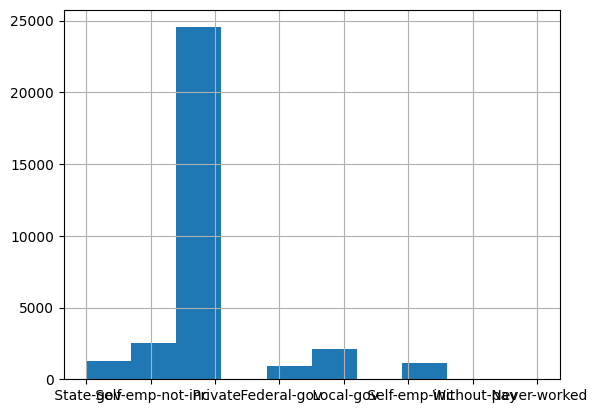

In [171]:
%matplotlib inline
data['workclass'].hist(bins = 10)


<Axes: >

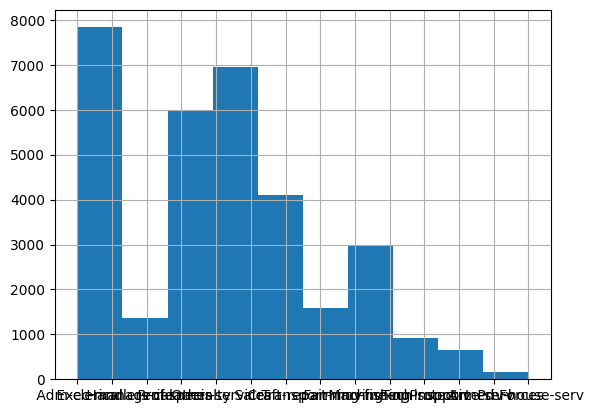

In [172]:
data['occupation'].hist(bins = 10)


<Axes: >

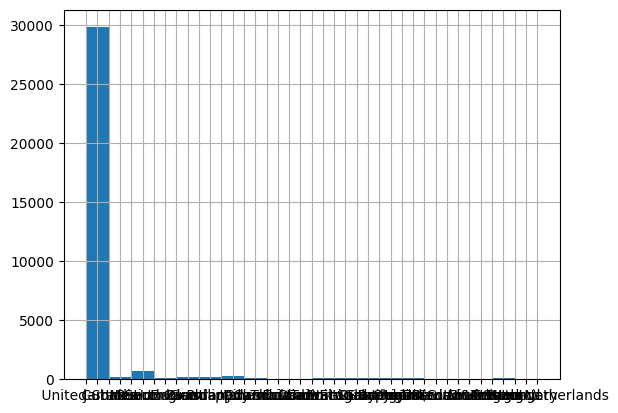

In [173]:
data['native-country'].hist(bins = 20)